<a href="https://colab.research.google.com/github/jrebull/ChileSistemasRecomendacion/blob/main/6_practico_recomendacion_imagenes_completado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magister en Inteligencia Artificial

<center>

[![Institution](https://img.shields.io/badge/Institution-Pontificia%20Universidad%20Cat%C3%B3lica%20de%20Chile-003A70?style=for-the-badge&logo=graduation-cap)](https://www.uc.cl)
[![Course](https://img.shields.io/badge/Course-Sistemas%20de%20Recomendaci%C3%B3n-FF6B6B?style=for-the-badge&logo=star)](https://www.uc.cl)
[![Activity](https://img.shields.io/badge/Pr%C3%A1ctico%20Clase%206-Google%20Colab-F9AB00?style=for-the-badge&logo=googlecolab)](https://colab.research.google.com)

</center>

---

## **Sistemas de Recomendacion**

### **Equipo Docente**
- **Profesor:** Vicente Dominguez

---

## **<font color="#895cf9">Practico Clase 6: Deep Learning para Recomendacion de Imagenes</font>**

### **Detalles de la Actividad**

| Aspecto | Descripcion |
|:--------|:------------|
| **Tema** | Recomendacion basada en similitud visual usando CNNs |
| **Arquitecturas** | VGG16 y VGG19 |
| **Dataset** | Fashion Images |
| **Formato de entrega** | Notebook |
| **Fecha de entrega** | 30 de Noviembre 2025 |

---

## **Alumno**

<center>

<img src="https://iili.io/KuvsGKx.png" alt="Javier Augusto Rebull Saucedo" width="150" style="border-radius: 50%;">

### **Javier Augusto Rebull Saucedo**

**Programa:** Magister en Inteligencia Artificial - Pontificia Universidad Catolica de Chile

Estudiante Invitado | MNA Tecnologico de Monterrey

</center>

---

## **<font color="orange">Objetivo del Practico</font>**

Implementar un sistema de recomendacion de productos de moda basado exclusivamente en similitud visual utilizando:

- **Extraccion de caracteristicas** mediante redes neuronales convolucionales pre-entrenadas
- **Comparacion de arquitecturas:** VGG16 vs VGG19
- **Similitud coseno** para recuperar productos visualmente similares

---

## 📖 **Introducción**

Los sistemas de recomendación basados en contenido visual han ganado relevancia en aplicaciones de e-commerce de moda, donde la apariencia del producto es fundamental para la decisión de compra. A diferencia de los sistemas tradicionales que dependen de metadata o comportamiento del usuario, este enfoque utiliza **Deep Learning** para extraer características visuales directamente de las imágenes.

En este práctico, implementaremos un sistema de recomendación que:
1. Utiliza redes convolucionales pre-entrenadas (**VGG16** y **VGG19**) como extractores de features
2. Calcula similitud coseno entre vectores de características
3. Recomienda productos visualmente similares basándose únicamente en la imagen

Este enfoque es particularmente útil cuando no se dispone de suficiente información de usuarios o cuando la similitud visual es el criterio principal de recomendación.

---

# Práctico Deep Learning para Recomendación

Diplomado Machine Learning Aplicado, PUC Chile

**Profesor:** Vicente Domínguez

**Alumno:** Javier Augusto Rebull Saucedo

En esta actividad trabajaremos con un recomendador de ropa basado netamente en las imagenes más similares extrayendo features con redes neuronales convolucionales.



## 📦 **Importación de Librerías**

In [1]:
# --- Deep Learning: Modelos pre-entrenados ---
from keras.applications import vgg16, vgg19, ResNet50  # Arquitecturas CNN pre-entrenadas en ImageNet
from keras.models import Model                          # Clase para definir modelos personalizados
from keras.applications.imagenet_utils import preprocess_input  # Preprocesamiento estandar para CNNs

# --- Deep Learning: Utilidades de imagen ---
from tensorflow.keras.utils import load_img, img_to_array  # Carga y conversion de imagenes a arrays

# --- Procesamiento de imagenes ---
from PIL import Image  # Manipulacion basica de imagenes (Python Imaging Library)

# --- Computacion numerica y datos ---
import numpy as np   # Operaciones con arrays y matrices
import pandas as pd  # Manipulacion y analisis de datos tabulares

# --- Machine Learning: Metricas ---
from sklearn.metrics.pairwise import cosine_similarity  # Calculo de similitud coseno entre vectores

# --- Visualizacion ---
import matplotlib.pyplot as plt  # Generacion de graficos y visualizaciones

# --- Utilidades del sistema ---
import os  # Interaccion con el sistema de archivos

# --Extras--
import seaborn as sns

En esta sección se trabajará con modelos pre-entrenados de redes convolucionales (CNN) que extraen caracteristicas visuales de las imagenes.

![Ejemplo de red convolucional](https://www.researchgate.net/publication/326658868/figure/fig3/AS:962202072805390@1606418259908/AlexNet-architecture-This-shows-the-process-to-obtain-the-latent-feature-vector-we-use.png)


Para los curiosos se recomienda revisar los siguientes links:

- Artículo: [Understand Deep Residual Networks](https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624)
- [Keras applications](https://keras.io/applications/)

# descarga de imagenes

In [2]:
%%capture
!gdown 1iLOeNZw69iyYXa7QS5ZutN7ACUpkbL3x
!unzip images_fashion.zip
!mkdir images
!mv *.png images/

# cargamos la CNN pre-entrenada en ImageNet


In [3]:
# cargamos el modelo escoger

modelo_escogido = 'vgg19' #@param["vgg16", "vgg19"]

if modelo_escogido == 'vgg16':
  # cargar modelo
  vgg_model = vgg16.VGG16(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()

elif modelo_escogido == 'vgg19':
  # cargar modelo
  vgg19_model = vgg19.VGG19(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg19_model.input, outputs=vgg19_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()



574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 139,570,240 (532.42 MB)

 Trainable params: 139,570,240 (532.42 MB)

 Non-trainable params: 0 (0.00 B)

## procesamiento de imágenes para dárselas como input a la CNN

In [4]:
ls

images/  images_fashion.zip  __MACOSX/  sample_data/  style.csv  style.txt


In [5]:
imgs_path = "images/" # ruta

imgs_model_width, imgs_model_height = 224, 224 # tamaño de las imagenes 224x224 pixeles

nb_closest_images = 5 # cantidad de imagenes similares a recomendar

In [6]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "png" in x]
print("total de imagenes:",len(files))

total de imagenes: 2184


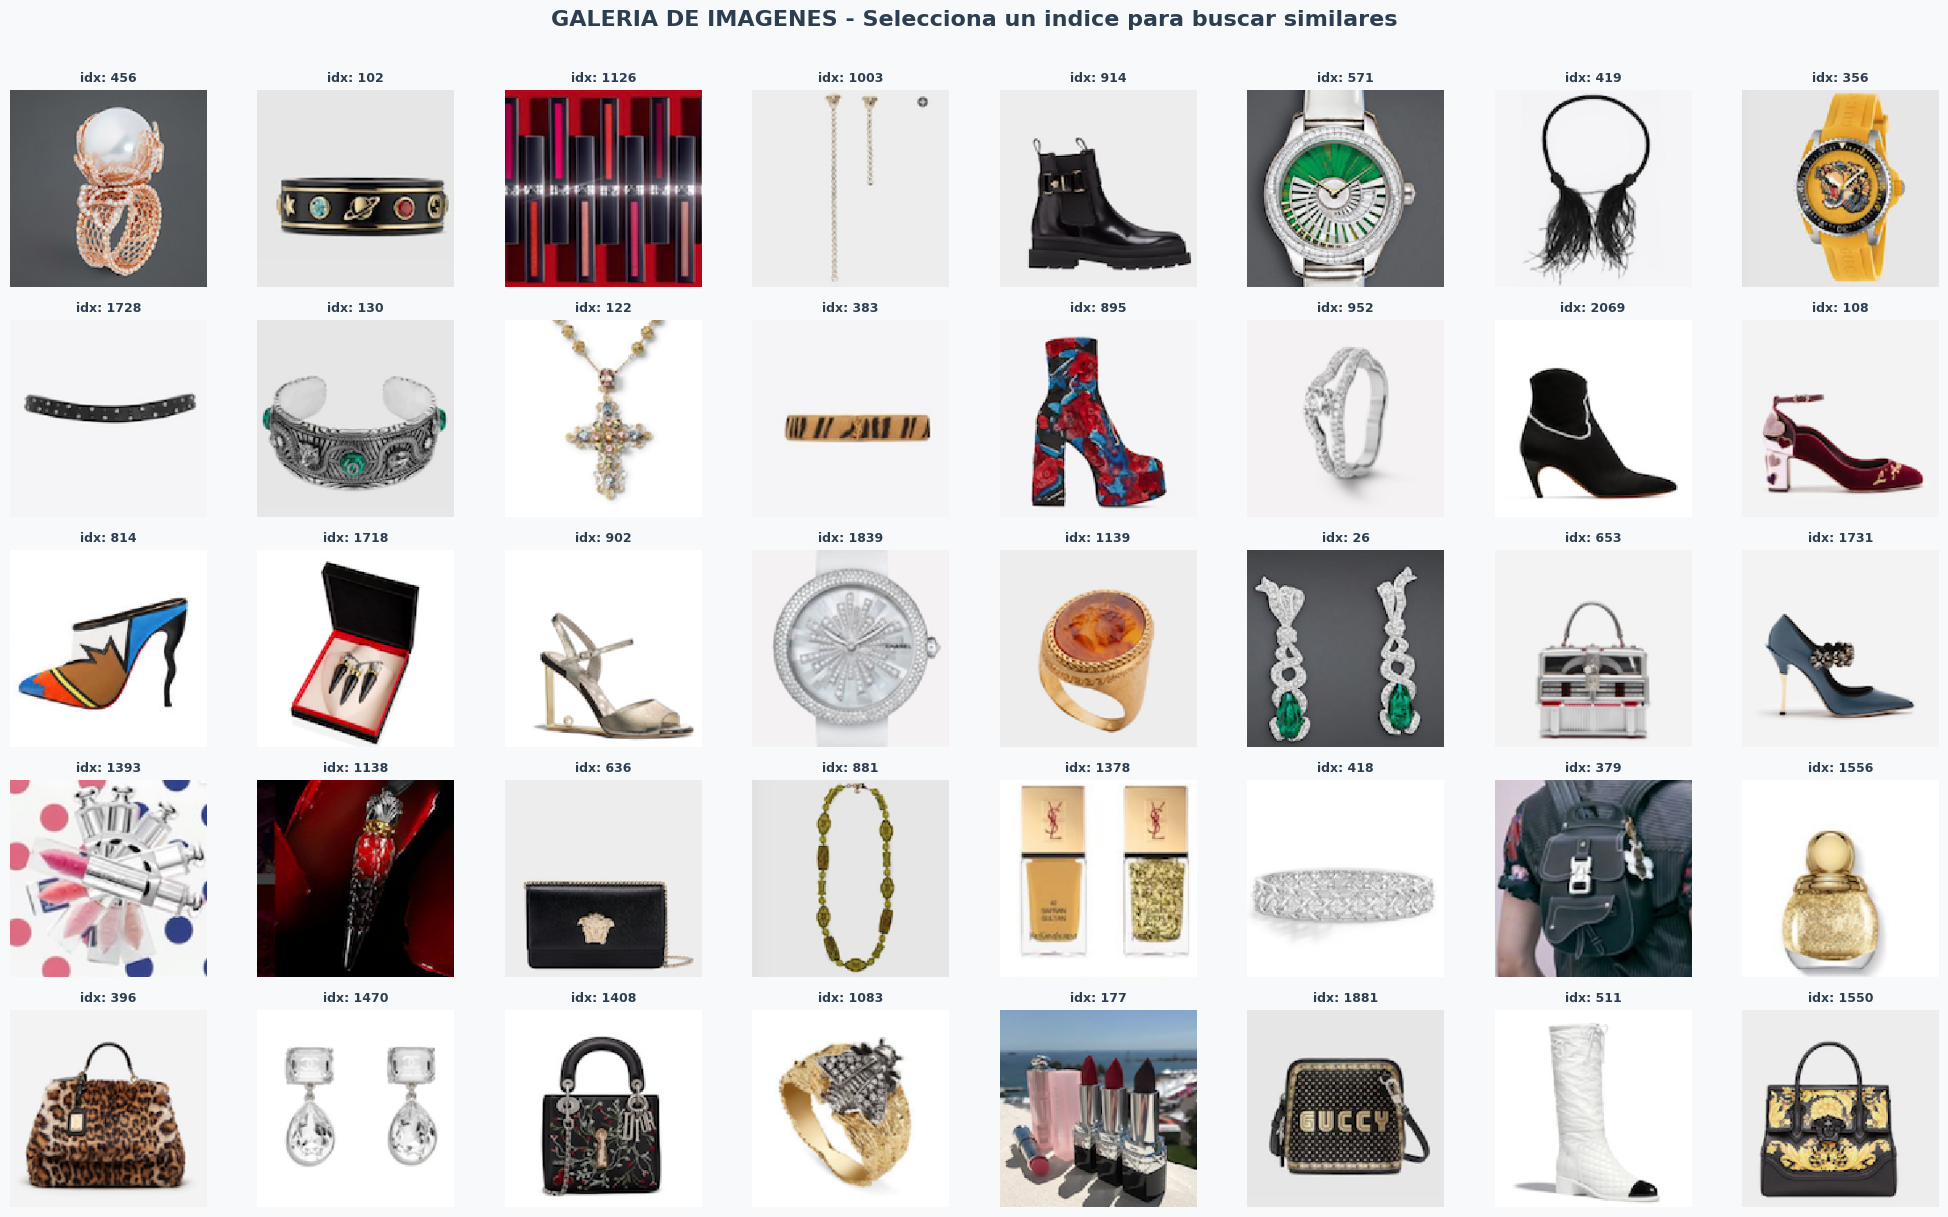


Indices disponibles en esta muestra:
[456, 102, 1126, 1003, 914, 571, 419, 356, 1728, 130, 122, 383, 895, 952, 2069, 108, 814, 1718, 902, 1839, 1139, 26, 653, 1731, 1393, 1138, 636, 881, 1378, 418, 379, 1556, 396, 1470, 1408, 1083, 177, 1881, 511, 1550]

Total de imagenes en el dataset: 2184


In [7]:
# ============================================================================
# GALERIA DE 40 IMAGENES ALEATORIAS PARA SELECCION
# ============================================================================

import random

random.seed(42)  # Cambiar seed para ver diferentes imagenes
sample_indices = random.sample(range(len(files)), 40)

fig, axes = plt.subplots(5, 8, figsize=(20, 12), facecolor='#f8f9fa')

for i, ax in enumerate(axes.flat):
    idx = sample_indices[i]
    img = load_img(files[idx], target_size=(imgs_model_width, imgs_model_height))
    ax.imshow(img)
    ax.set_title(f'idx: {idx}', fontsize=9, fontweight='bold', color='#2c3e50')
    ax.axis('off')

plt.suptitle('GALERIA DE IMAGENES - Selecciona un indice para buscar similares',
             fontsize=16, fontweight='bold', color='#2c3e50', y=1.01)
plt.tight_layout()
plt.show()

print("\nIndices disponibles en esta muestra:")
print(sample_indices)
print(f"\nTotal de imagenes en el dataset: {len(files)}")

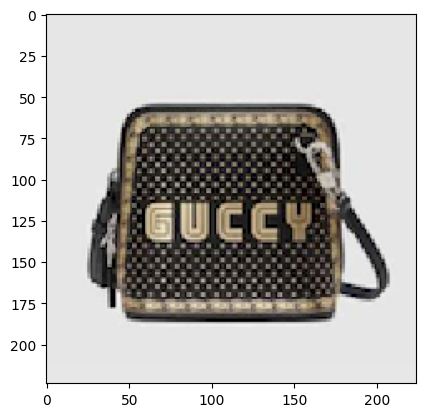

Indice: 1881
Imagen cargada exitosamente!


In [8]:
# Imagen seleccionada manualmente
idx = 1881  # Indice fijo seleccionado de la galeria
original = load_img(files[idx], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print(f"Indice: {idx}")
print("Imagen cargada exitosamente!")

In [9]:
# convertir PIL image a numpy array
numpy_image = img_to_array(original)

# convertir imagen a batch de imagenes para entrenamiento mas eficiente
image_batch = np.expand_dims(numpy_image, axis=0)

# preparamos la imagen para la VGG16
processed_image = preprocess_input(image_batch.copy())

print(f"Imagen procesada: idx = {idx}")
print(f"Archivo: {files[idx]}")
print(f"Image batch size: {image_batch.shape}")

processed_image

Imagen procesada: idx = 1881
Archivo: images/3_2_045.png
Image batch size: (1, 224, 224, 3)


array([[[[126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         ...,
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ]],

        [[126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         ...,
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ]],

        [[126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         ...,
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ]],

        ...,

        [[127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ],
         ...,
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ]],

        [[

### Visualización del Preprocesamiento de Imágenes

A continuación se muestra el proceso de transformación que sufre una imagen antes de ser procesada por la CNN. Esta visualización incluye la descomposición en canales RGB, histogramas de distribución de píxeles, mapas de intensidad y una vista matricial de los valores numéricos que componen la imagen.

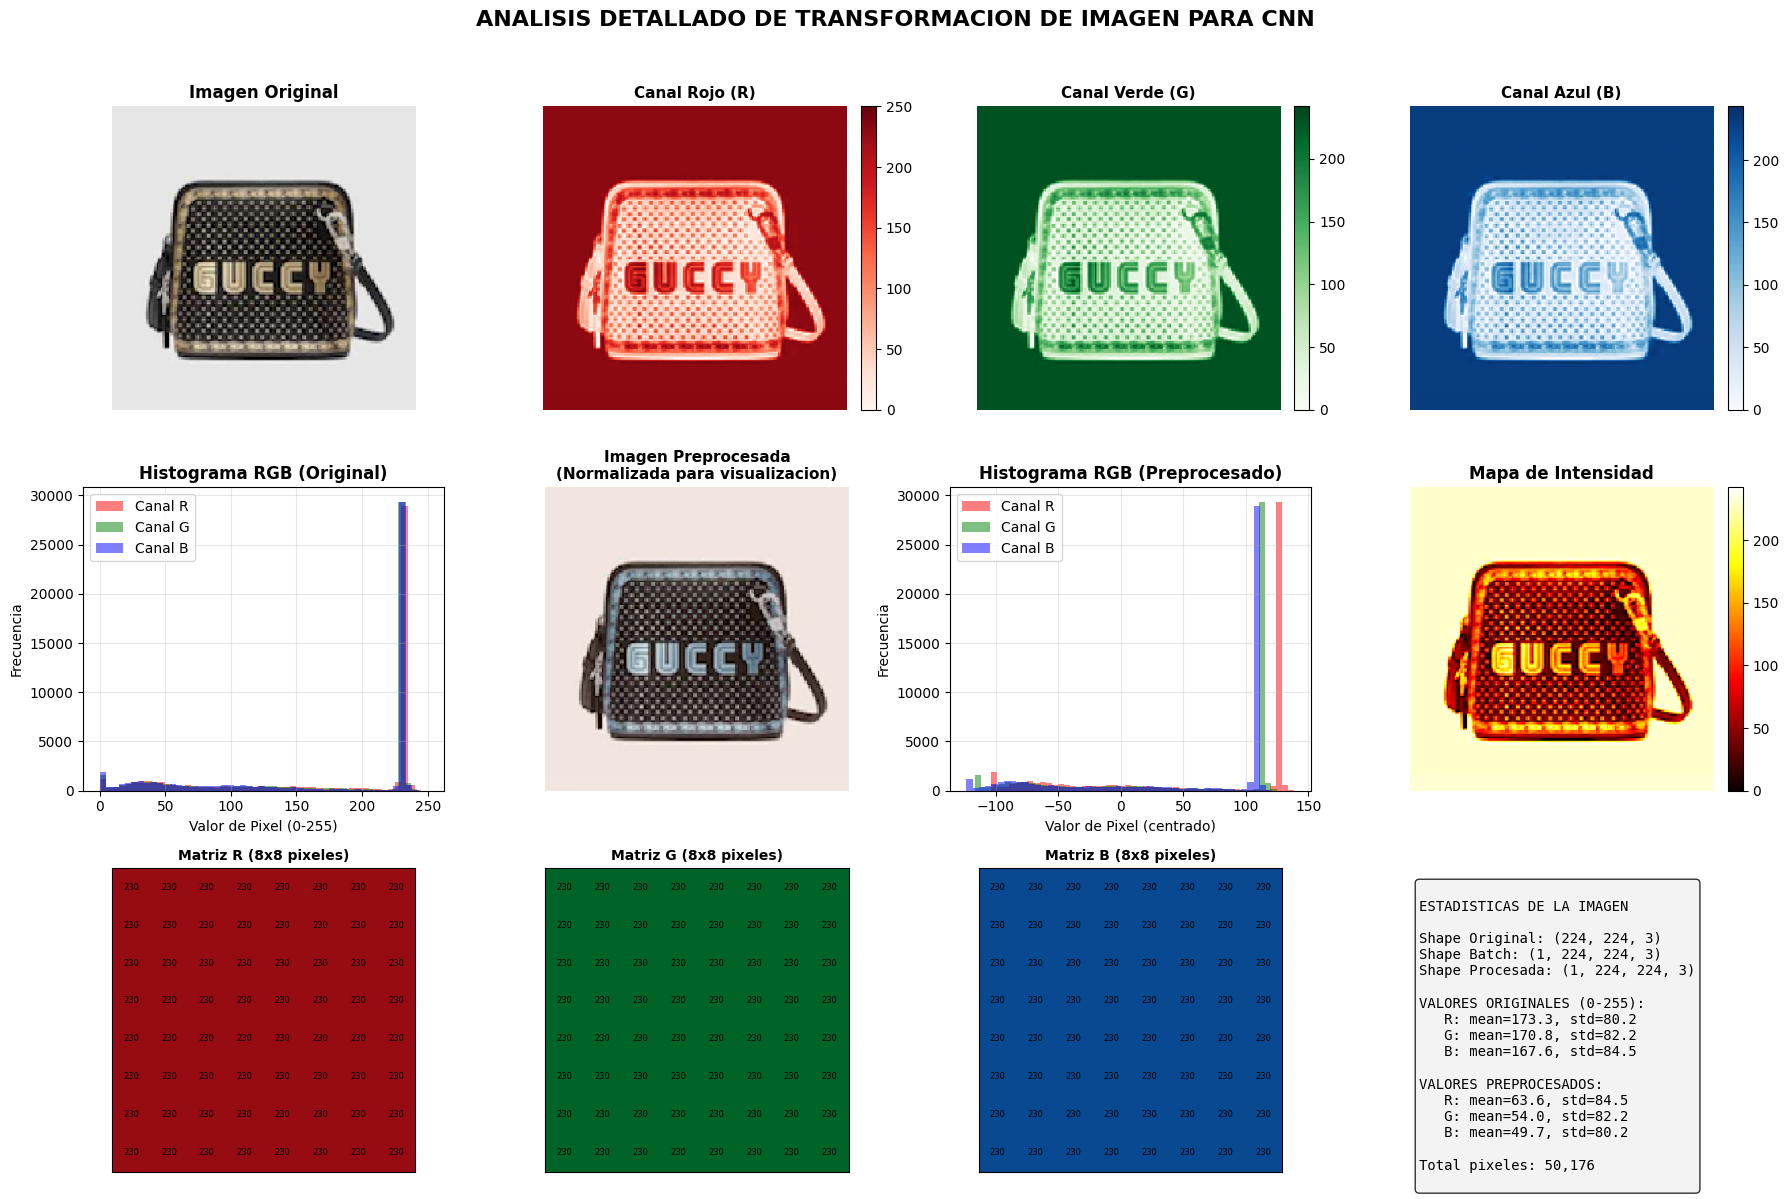


Imagen convertida y preprocesada exitosamente para la CNN!


In [10]:
# ============================================================================
# VISUALIZACIÓN DETALLADA DE LA TRANSFORMACIÓN
# ============================================================================

fig = plt.figure(figsize=(18, 12))

# 1. Imagen Original
ax1 = fig.add_subplot(3, 4, 1)
ax1.imshow(original)
ax1.set_title('Imagen Original', fontsize=12, fontweight='bold')
ax1.axis('off')

# 2-4. Canales RGB separados
channel_names = ['Canal Rojo (R)', 'Canal Verde (G)', 'Canal Azul (B)']
cmaps = ['Reds', 'Greens', 'Blues']

for i in range(3):
    ax = fig.add_subplot(3, 4, i+2)
    im = ax.imshow(numpy_image[:,:,i], cmap=cmaps[i])
    ax.set_title(channel_names[i], fontsize=11, fontweight='bold')
    ax.axis('off')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# 5. Histograma de valores de píxeles (antes del preprocesamiento)
ax5 = fig.add_subplot(3, 4, 5)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    ax5.hist(numpy_image[:,:,i].flatten(), bins=50, alpha=0.5, color=color, label=f'Canal {color[0].upper()}')
ax5.set_title('Histograma RGB (Original)', fontsize=12, fontweight='bold')
ax5.set_xlabel('Valor de Pixel (0-255)')
ax5.set_ylabel('Frecuencia')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Imagen preprocesada (normalizada para visualización)
ax6 = fig.add_subplot(3, 4, 6)
# Normalizar para visualización (el preprocesamiento puede dar valores negativos)
processed_vis = processed_image[0] - processed_image[0].min()
processed_vis = (processed_vis / processed_vis.max() * 255).astype(np.uint8)
ax6.imshow(processed_vis)
ax6.set_title('Imagen Preprocesada\n(Normalizada para visualizacion)', fontsize=11, fontweight='bold')
ax6.axis('off')

# 7. Histograma después del preprocesamiento
ax7 = fig.add_subplot(3, 4, 7)
for i, color in enumerate(colors):
    ax7.hist(processed_image[0,:,:,i].flatten(), bins=50, alpha=0.5, color=color, label=f'Canal {color[0].upper()}')
ax7.set_title('Histograma RGB (Preprocesado)', fontsize=12, fontweight='bold')
ax7.set_xlabel('Valor de Pixel (centrado)')
ax7.set_ylabel('Frecuencia')
ax7.legend()
ax7.grid(True, alpha=0.3)

# 8. Heatmap de intensidad promedio
ax8 = fig.add_subplot(3, 4, 8)
intensity = np.mean(numpy_image, axis=2)
im8 = ax8.imshow(intensity, cmap='hot')
ax8.set_title('Mapa de Intensidad', fontsize=12, fontweight='bold')
ax8.axis('off')
plt.colorbar(im8, ax=ax8, fraction=0.046, pad=0.04)

# 9-11. Vista de matriz numérica (esquina superior izquierda 8x8)
for i in range(3):
    ax = fig.add_subplot(3, 4, 9+i)
    patch = numpy_image[:8, :8, i]
    im = ax.imshow(patch, cmap=cmaps[i], vmin=0, vmax=255)
    ax.set_title(f'Matriz {["R","G","B"][i]} (8x8 pixeles)', fontsize=10, fontweight='bold')
    # Añadir valores numéricos
    for y in range(8):
        for x in range(8):
            ax.text(x, y, f'{int(patch[y,x])}', ha='center', va='center',
                    fontsize=6, color='white' if patch[y,x] < 128 else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

# 12. Estadísticas
ax12 = fig.add_subplot(3, 4, 12)
ax12.axis('off')
stats_text = f"""
ESTADISTICAS DE LA IMAGEN

Shape Original: {numpy_image.shape}
Shape Batch: {image_batch.shape}
Shape Procesada: {processed_image.shape}

VALORES ORIGINALES (0-255):
   R: mean={numpy_image[:,:,0].mean():.1f}, std={numpy_image[:,:,0].std():.1f}
   G: mean={numpy_image[:,:,1].mean():.1f}, std={numpy_image[:,:,1].std():.1f}
   B: mean={numpy_image[:,:,2].mean():.1f}, std={numpy_image[:,:,2].std():.1f}

VALORES PREPROCESADOS:
   R: mean={processed_image[0,:,:,0].mean():.1f}, std={processed_image[0,:,:,0].std():.1f}
   G: mean={processed_image[0,:,:,1].mean():.1f}, std={processed_image[0,:,:,1].std():.1f}
   B: mean={processed_image[0,:,:,2].mean():.1f}, std={processed_image[0,:,:,2].std():.1f}

Total pixeles: {numpy_image.shape[0] * numpy_image.shape[1]:,}
"""
ax12.text(0.1, 0.95, stats_text, transform=ax12.transAxes, fontsize=10,
          verticalalignment='top', fontfamily='monospace',
          bbox=dict(boxstyle='round', facecolor='#f0f0f0', alpha=0.8))

plt.suptitle('ANALISIS DETALLADO DE TRANSFORMACION DE IMAGEN PARA CNN',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nImagen convertida y preprocesada exitosamente para la CNN!")

In [11]:
# obtenemos los features (embeddings) de las imagenes pasandolas por la VGG16
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
features successfully extracted!
number of image features: 4096


array([[0.       , 0.       , 1.282129 , ..., 0.       , 0.       ,
        3.2349215]], dtype=float32)

In [12]:
img_features.shape

(1, 4096)

In [13]:
# repetimos el mismo proceso para todas las imagenes y guardamos los batch en una lista para entregarselos procesados a la VGG16
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [14]:
# obtenemos los features para cada imagen con la CNN
imgs_features = feat_extractor.predict(processed_imgs)

print("features extraidos exitosamente!")
imgs_features.shape

69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 238ms/step
features extraidos exitosamente!


(2184, 4096)

In [15]:
# computa similaridad coseno entre los features de las imagenes
cosSimilarities = cosine_similarity(imgs_features)

# guardamos los resultados en un dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df #.head()

images/4_9_037.png  images/6_7_002.png  \
images/4_9_037.png            1.000000            0.234604   
images/6_7_002.png            0.234604            1.000000   
images/0_0_065.png            0.270189            0.511521   
images/2_2_016.png            0.249941            0.383287   
images/3_0_051.png            0.255349            0.462207   
...                                ...                 ...   
images/5_0_041.png            0.224119            0.623821   
images/2_1_024.png            0.262152            0.177394   
images/6_2_036.png            0.234611            0.275122   
images/1_0_045.png            0.259536            0.477618   
images/1_6_028.png            0.518413            0.438690   

                    images/0_0_065.png  images/2_2_016.png  \
images/4_9_037.png            0.270189            0.249941   
images/6_7_002.png            0.511521            0.383287   
images/0_0_065.png            1.000000            0.334260   
images/2_2_016.png            0.334260            1.000000   
images/3_0_051.png            0.428377            0.282075   
...                                ...                 ...   
images/5_0_041.png            0.551125            0.308903   
images/2_1_024.png            0.156673            0.175529   
images/6_2_036.png            0.254642            0.516861   
images/1_0_045.png            0.574103            0.260724   
images/1_6_028.png            0.470782            0.333543   

                    images/3_0_051.png  images/4_6_073.png  \
images/4_9_037.png            0.255349            0.680604   
images/6_7_002.png            0.462207            0.206403   
images/0_0_065.png            0.428377            0.245892   
images/2_2_016.png            0.282075            0.236036   
images/3_0_051.png            1.000000            0.230695   
...                                ...                 ...   
images/5_0_041.png            0.366985            0.223562   
images/2_1_024.png            0.283139            0.217404   
images/6_2_036.png            0.305349            0.256257   
images/1_0_045.png            0.574615            0.271201   
images/1_6_028.png            0.477951            0.340128   

                    images/6_4_014.png  images/1_4_023.png  \
images/4_9_037.png            0.349751            0.518958   
images/6_7_002.png            0.289353            0.319520   
images/0_0_065.png            0.404932            0.334245   
images/2_2_016.png            0.381667            0.353902   
images/3_0_051.png            0.282458            0.370668   
...                                ...                 ...   
images/5_0_041.png            0.258447            0.245701   
images/2_1_024.png            0.197698            0.252936   
images/6_2_036.png            0.418394            0.341405   
images/1_0_045.png            0.390164            0.399710   
images/1_6_028.png            0.419501            0.471213   

                    images/4_1_031.png  images/0_2_008.png  ...  \
images/4_9_037.png            0.241923            0.277481  ...   
images/6_7_002.png            0.146800            0.325533  ...   
images/0_0_065.png            0.148620            0.290298  ...   
images/2_2_016.png            0.113987            0.393667  ...   
images/3_0_051.png            0.177571            0.308622  ...   
...                                ...                 ...  ...   
images/5_0_041.png            0.145548            0.340220  ...   
images/2_1_024.png            0.313078            0.255857  ...   
images/6_2_036.png            0.130103            0.325769  ...   
images/1_0_045.png            0.178354            0.262325  ...   
images/1_6_028.png            0.166863            0.323689  ...   

                    images/4_9_001.png  images/1_7_016.png  \
images/4_9_037.png            0.351203            0.430215   
images/6_7_002.png            0.213976            0.380928   
images/0_0_065.png            0.207807           

Imagen de referencia: idx = 1881
Archivo: images/3_2_045.png



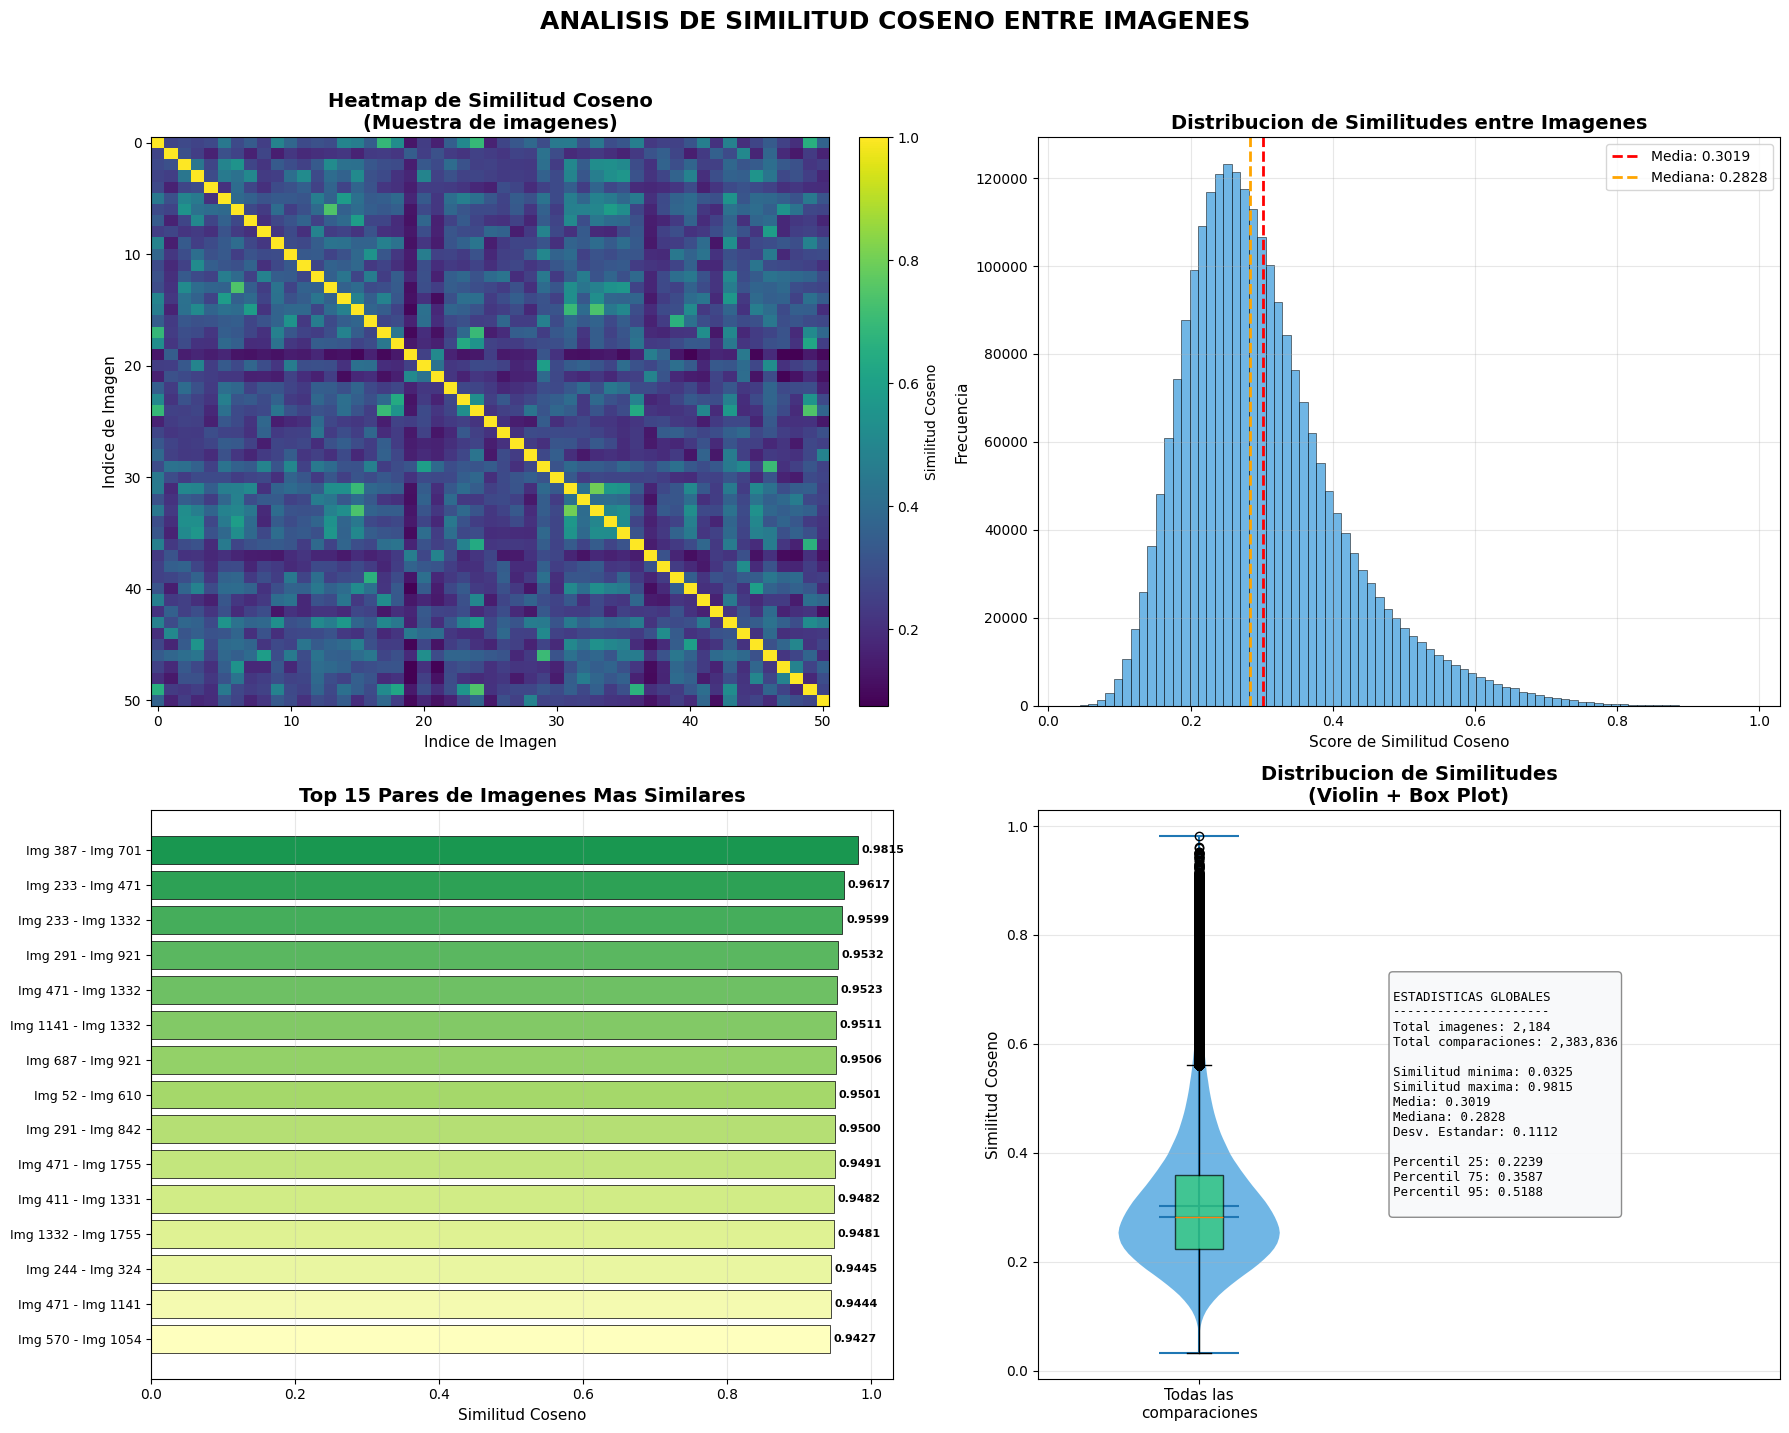


Matriz de similitud calculada exitosamente!
Dimensiones: 2184 x 2184 = 4,769,856 comparaciones


In [16]:
# ============================================================================
# VISUALIZACION DE LA MATRIZ DE SIMILITUD COSENO
# ============================================================================

print(f"Imagen de referencia: idx = {idx}")
print(f"Archivo: {files[idx]}")
print("="*60 + "\n")

fig = plt.figure(figsize=(18, 14))

# 1. Heatmap de la matriz de similitud completa
ax1 = fig.add_subplot(2, 2, 1)
# Tomamos una muestra para que sea visible (cada N imagenes)
sample_step = max(1, len(files) // 50)
sample_indices = list(range(0, len(files), sample_step))
similarity_sample = cosSimilarities[np.ix_(sample_indices, sample_indices)]

im1 = ax1.imshow(similarity_sample, cmap='viridis', aspect='auto')
ax1.set_title('Heatmap de Similitud Coseno\n(Muestra de imagenes)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Indice de Imagen', fontsize=11)
ax1.set_ylabel('Indice de Imagen', fontsize=11)
cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
cbar1.set_label('Similitud Coseno', fontsize=10)

# 2. Distribucion de similitudes (histograma)
ax2 = fig.add_subplot(2, 2, 2)
# Extraer triangulo superior (sin diagonal) para evitar duplicados
upper_triangle = cosSimilarities[np.triu_indices_from(cosSimilarities, k=1)]
ax2.hist(upper_triangle, bins=80, color='#3498db', alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axvline(upper_triangle.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {upper_triangle.mean():.4f}')
ax2.axvline(np.median(upper_triangle), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {np.median(upper_triangle):.4f}')
ax2.set_title('Distribucion de Similitudes entre Imagenes', fontsize=14, fontweight='bold')
ax2.set_xlabel('Score de Similitud Coseno', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Top 10 pares mas similares (excluyendo la misma imagen)
ax3 = fig.add_subplot(2, 2, 3)
# Encontrar los pares mas similares
n_images = len(files)
pairs = []
for i in range(n_images):
    for j in range(i+1, n_images):
        pairs.append((i, j, cosSimilarities[i, j]))

# Ordenar por similitud descendente
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)[:15]

# Graficar barras horizontales
pair_labels = [f'Img {p[0]} - Img {p[1]}' for p in pairs_sorted]
pair_scores = [p[2] for p in pairs_sorted]
colors_gradient = plt.cm.RdYlGn(np.linspace(0.9, 0.5, len(pair_scores)))

bars = ax3.barh(range(len(pair_labels)), pair_scores, color=colors_gradient, edgecolor='black', linewidth=0.5)
ax3.set_yticks(range(len(pair_labels)))
ax3.set_yticklabels(pair_labels, fontsize=9)
ax3.set_xlabel('Similitud Coseno', fontsize=11)
ax3.set_title('Top 15 Pares de Imagenes Mas Similares', fontsize=14, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(True, axis='x', alpha=0.3)

# Añadir valores en las barras
for bar, score in zip(bars, pair_scores):
    ax3.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{score:.4f}', va='center', fontsize=8, fontweight='bold')

# 4. Estadisticas y boxplot
ax4 = fig.add_subplot(2, 2, 4)

# Boxplot con violin plot combinado
parts = ax4.violinplot([upper_triangle], positions=[1], showmeans=True, showmedians=True)
parts['bodies'][0].set_facecolor('#3498db')
parts['bodies'][0].set_alpha(0.7)

# Boxplot superpuesto
bp = ax4.boxplot([upper_triangle], positions=[1], widths=0.15, patch_artist=True)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][0].set_alpha(0.7)

ax4.set_ylabel('Similitud Coseno', fontsize=11)
ax4.set_title('Distribucion de Similitudes\n(Violin + Box Plot)', fontsize=14, fontweight='bold')
ax4.set_xticks([1])
ax4.set_xticklabels(['Todas las\ncomparaciones'], fontsize=11)
ax4.grid(True, axis='y', alpha=0.3)

# Añadir estadisticas como texto
stats_text = f"""
ESTADISTICAS GLOBALES
---------------------
Total imagenes: {n_images:,}
Total comparaciones: {len(upper_triangle):,}

Similitud minima: {upper_triangle.min():.4f}
Similitud maxima: {upper_triangle.max():.4f}
Media: {upper_triangle.mean():.4f}
Mediana: {np.median(upper_triangle):.4f}
Desv. Estandar: {upper_triangle.std():.4f}

Percentil 25: {np.percentile(upper_triangle, 25):.4f}
Percentil 75: {np.percentile(upper_triangle, 75):.4f}
Percentil 95: {np.percentile(upper_triangle, 95):.4f}
"""
ax4.text(1.6, 0.5, stats_text, transform=ax4.get_xaxis_transform(), fontsize=9,
         verticalalignment='center', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='#f8f9fa', alpha=0.9, edgecolor='gray'))

ax4.set_xlim(0.5, 2.8)

plt.suptitle('ANALISIS DE SIMILITUD COSENO ENTRE IMAGENES',
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\nMatriz de similitud calculada exitosamente!")
print(f"Dimensiones: {cosSimilarities.shape[0]} x {cosSimilarities.shape[1]} = {cosSimilarities.shape[0]**2:,} comparaciones")

In [17]:
# esta funcion recupera las imagenes más similares dada una imagen entregada por el usuario
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("producto escogido:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("productos más similares:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("score de similaridad : ",closest_imgs_scores[i])

Indice seleccionado: 1881
Archivo: images/3_2_045.png


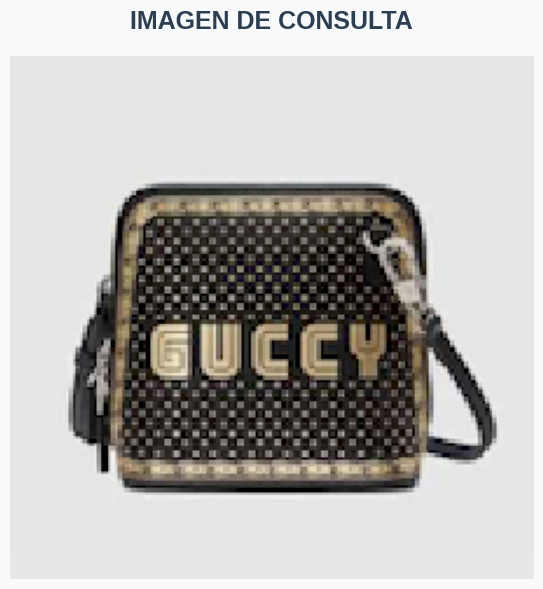


TOP 5 PRODUCTOS RECOMENDADOS



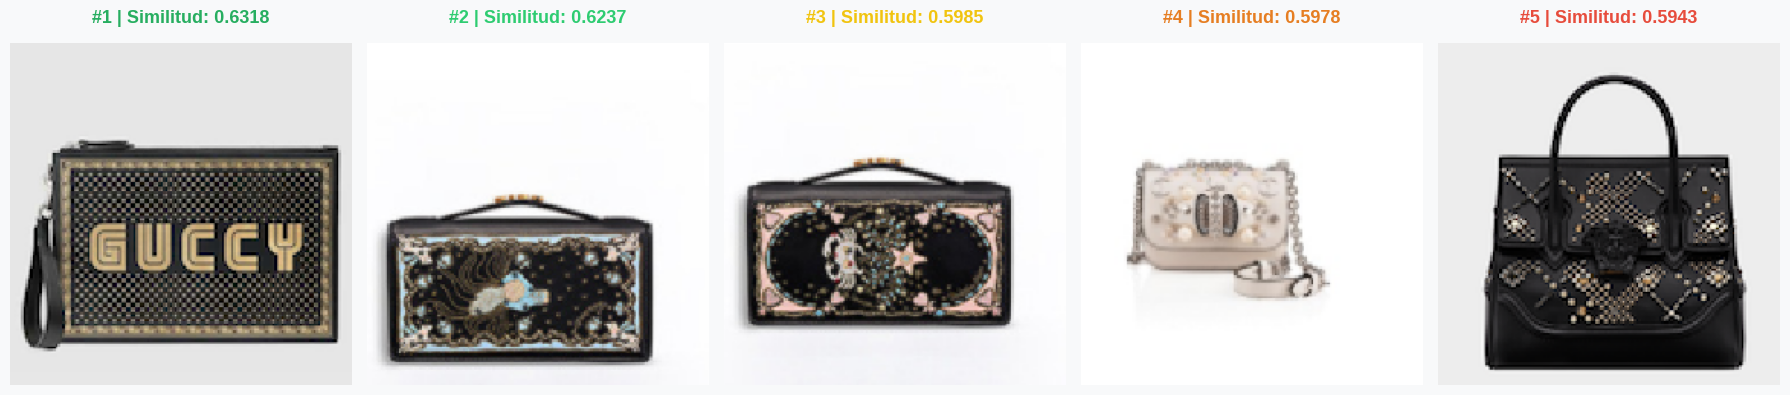


ANALISIS COMPARATIVO DE FEATURES



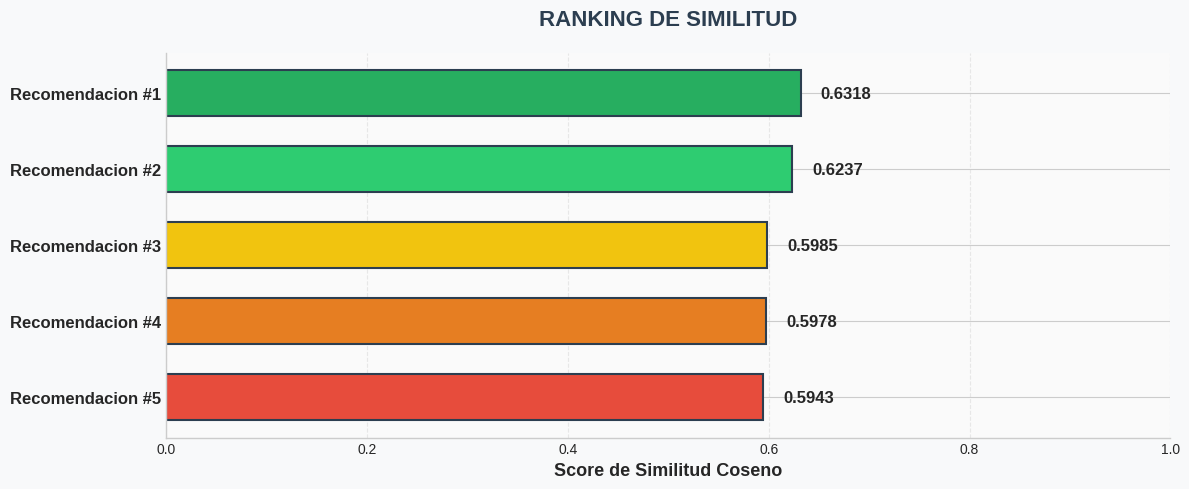

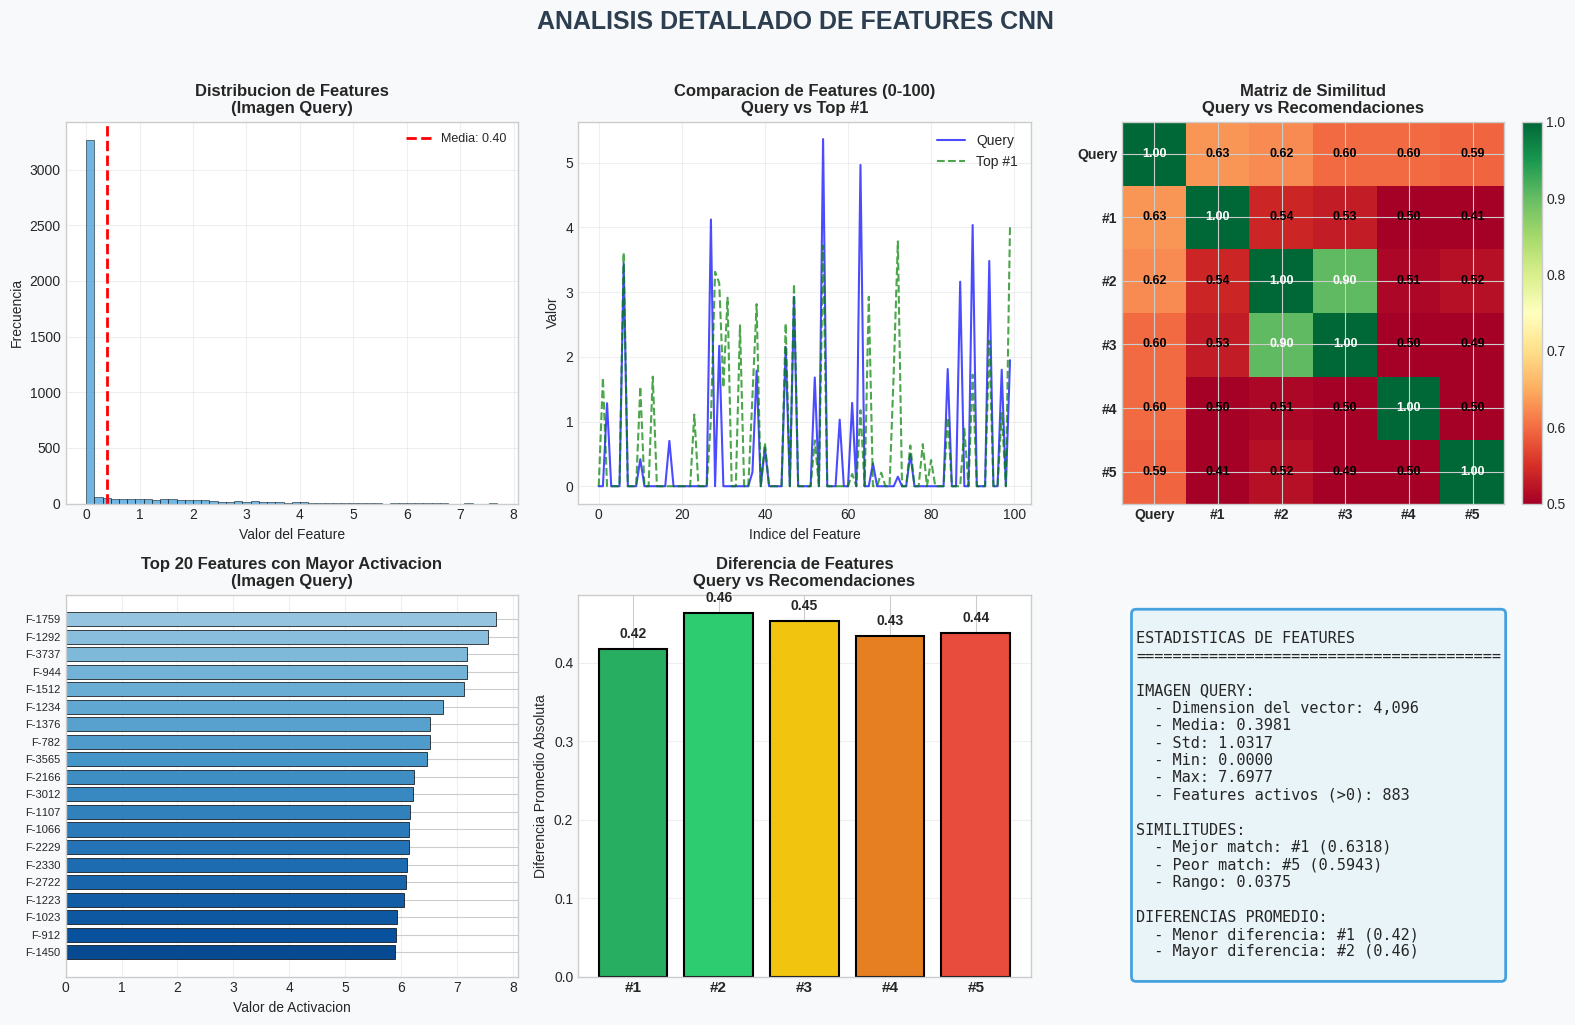



+==============================================================+
|                  RESUMEN DE RECOMENDACIONES                  |
+==============================================================+
| Ranking    | Similitud       | Archivo                        |
+--------------------------------------------------------------+
| #1         | 0.6318          | 3_2_066.png                    |
| #2         | 0.6237          | 4_2_030.png                    |
| #3         | 0.5985          | 4_2_029.png                    |
| #4         | 0.5978          | 0_2_006.png                    |
| #5         | 0.5943          | 5_2_059.png                    |
+==============================================================+


In [23]:
# ============================================================================
# VISUALIZACION DE RECOMENDACIONES CON ANALISIS DE FEATURES
# ============================================================================

query_image = files[idx]

print(f"Indice seleccionado: {idx}")
print(f"Archivo: {query_image}")

# Obtener las imagenes mas similares y sus scores
closest_imgs = cos_similarities_df[query_image].sort_values(ascending=False)[1:nb_closest_images+1]
closest_imgs_paths = closest_imgs.index.tolist()
closest_imgs_scores = closest_imgs.values

# Obtener indices para extraer features
query_idx = files.index(query_image)
rec_indices = [files.index(p) for p in closest_imgs_paths]

# Colores para ranking
ranking_colors = ['#27ae60', '#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']

# ============================================================================
# FIGURA 1: Imagen de Consulta
# ============================================================================
fig1, ax1 = plt.subplots(figsize=(6, 6), facecolor='#f8f9fa')
query_img = load_img(query_image, target_size=(imgs_model_width, imgs_model_height))
ax1.imshow(query_img)
ax1.set_title('IMAGEN DE CONSULTA', fontsize=18, fontweight='bold', color='#2c3e50', pad=20)
ax1.axis('off')

# Borde elegante
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_color('#3498db')
    spine.set_linewidth(5)

plt.tight_layout()
plt.show()

# ============================================================================
# FIGURA 2: Top 5 Recomendaciones
# ============================================================================
print("\n" + "="*70)
print("TOP 5 PRODUCTOS RECOMENDADOS")
print("="*70 + "\n")

fig2, axes2 = plt.subplots(1, nb_closest_images, figsize=(18, 4), facecolor='#f8f9fa')

for i in range(nb_closest_images):
    ax = axes2[i]
    rec_img = load_img(closest_imgs_paths[i], target_size=(imgs_model_width, imgs_model_height))
    ax.imshow(rec_img)
    ax.axis('off')

    score = closest_imgs_scores[i]
    ax.set_title(f'#{i+1} | Similitud: {score:.4f}', fontsize=13, fontweight='bold',
                 color=ranking_colors[i], pad=15)

    # Borde con color de ranking
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color(ranking_colors[i])
        spine.set_linewidth(4)

plt.tight_layout()
plt.show()

# ============================================================================
# FIGURA 3: Comparacion de Features (Barras)
# ============================================================================
print("\n" + "="*70)
print("ANALISIS COMPARATIVO DE FEATURES")
print("="*70 + "\n")

fig3, ax3 = plt.subplots(figsize=(12, 5), facecolor='#f8f9fa')

bars = ax3.barh(range(nb_closest_images), closest_imgs_scores,
                color=ranking_colors, edgecolor='#2c3e50', height=0.6, linewidth=1.5)

ax3.set_yticks(range(nb_closest_images))
ax3.set_yticklabels([f'Recomendacion #{i+1}' for i in range(nb_closest_images)], fontsize=12, fontweight='bold')
ax3.set_xlabel('Score de Similitud Coseno', fontsize=13, fontweight='bold')
ax3.set_title('RANKING DE SIMILITUD', fontsize=16, fontweight='bold', color='#2c3e50', pad=20)
ax3.set_xlim(0, 1)
ax3.invert_yaxis()
ax3.set_facecolor('#fafafa')
ax3.grid(True, axis='x', alpha=0.4, linestyle='--')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

for bar, score in zip(bars, closest_imgs_scores):
    ax3.text(score + 0.02, bar.get_y() + bar.get_height()/2,
             f'{score:.4f}', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# FIGURA 4: Comparacion de Vectores de Features
# ============================================================================
fig4, axes4 = plt.subplots(2, 3, figsize=(16, 10), facecolor='#f8f9fa')

# Features de la imagen query
query_features = imgs_features[query_idx]

# Plot 1: Distribucion de features de la imagen query
ax = axes4[0, 0]
ax.hist(query_features, bins=50, color='#3498db', alpha=0.7, edgecolor='black', linewidth=0.5)
ax.set_title('Distribucion de Features\n(Imagen Query)', fontsize=12, fontweight='bold')
ax.set_xlabel('Valor del Feature')
ax.set_ylabel('Frecuencia')
ax.axvline(query_features.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {query_features.mean():.2f}')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 2: Primeros 100 features comparados (Query vs Top 1)
print("\n")
ax = axes4[0, 1]
feature_range = range(100)
ax.plot(feature_range, query_features[:100], 'b-', alpha=0.7, linewidth=1.5, label='Query')
ax.plot(feature_range, imgs_features[rec_indices[0]][:100], 'g--', alpha=0.7, linewidth=1.5, label='Top #1')
ax.set_title('Comparacion de Features (0-100)\nQuery vs Top #1', fontsize=12, fontweight='bold')
ax.set_xlabel('Indice del Feature')
ax.set_ylabel('Valor')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 3: Heatmap de correlacion entre query y recomendaciones
print("\n")
ax = axes4[0, 2]
correlation_matrix = np.zeros((6, 6))
all_features = [query_features] + [imgs_features[idx] for idx in rec_indices]
labels = ['Query'] + [f'#{i+1}' for i in range(nb_closest_images)]

for i in range(6):
    for j in range(6):
        correlation_matrix[i, j] = cosine_similarity([all_features[i]], [all_features[j]])[0][0]

im = ax.imshow(correlation_matrix, cmap='RdYlGn', vmin=0.5, vmax=1)
ax.set_xticks(range(6))
ax.set_yticks(range(6))
ax.set_xticklabels(labels, fontsize=10, fontweight='bold')
ax.set_yticklabels(labels, fontsize=10, fontweight='bold')
ax.set_title('Matriz de Similitud\nQuery vs Recomendaciones', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Añadir valores en el heatmap
for i in range(6):
    for j in range(6):
        ax.text(j, i, f'{correlation_matrix[i,j]:.2f}', ha='center', va='center',
                fontsize=9, fontweight='bold', color='white' if correlation_matrix[i,j] > 0.75 else 'black')

# Plot 4: Activaciones mas altas (Top features)
ax = axes4[1, 0]
top_k = 20
top_indices = np.argsort(query_features)[-top_k:][::-1]
top_values = query_features[top_indices]

colors_bar = plt.cm.Blues(np.linspace(0.4, 0.9, top_k))
ax.barh(range(top_k), top_values, color=colors_bar, edgecolor='black', linewidth=0.5)
ax.set_yticks(range(top_k))
ax.set_yticklabels([f'F-{idx}' for idx in top_indices], fontsize=8)
ax.set_xlabel('Valor de Activacion')
ax.set_title(f'Top {top_k} Features con Mayor Activacion\n(Imagen Query)', fontsize=12, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, axis='x', alpha=0.3)

# Plot 5: Diferencia de features entre Query y cada recomendacion
ax = axes4[1, 1]
differences = []
for i, rec_idx in enumerate(rec_indices):
    diff = np.mean(np.abs(query_features - imgs_features[rec_idx]))
    differences.append(diff)

bars = ax.bar(range(nb_closest_images), differences, color=ranking_colors, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(nb_closest_images))
ax.set_xticklabels([f'#{i+1}' for i in range(nb_closest_images)], fontsize=11, fontweight='bold')
ax.set_ylabel('Diferencia Promedio Absoluta')
ax.set_title('Diferencia de Features\nQuery vs Recomendaciones', fontsize=12, fontweight='bold')
ax.grid(True, axis='y', alpha=0.3)

# Corregido: posicionar texto justo encima de cada barra
for i, (bar, diff) in enumerate(zip(bars, differences)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{diff:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 6: Estadisticas resumen
ax = axes4[1, 2]
ax.axis('off')

stats_text = f"""
ESTADISTICAS DE FEATURES
{'='*40}

IMAGEN QUERY:
  - Dimension del vector: {len(query_features):,}
  - Media: {query_features.mean():.4f}
  - Std: {query_features.std():.4f}
  - Min: {query_features.min():.4f}
  - Max: {query_features.max():.4f}
  - Features activos (>0): {np.sum(query_features > 0):,}

SIMILITUDES:
  - Mejor match: #{1} ({closest_imgs_scores[0]:.4f})
  - Peor match: #{nb_closest_images} ({closest_imgs_scores[-1]:.4f})
  - Rango: {closest_imgs_scores[0] - closest_imgs_scores[-1]:.4f}

DIFERENCIAS PROMEDIO:
  - Menor diferencia: #{np.argmin(differences)+1} ({min(differences):.2f})
  - Mayor diferencia: #{np.argmax(differences)+1} ({max(differences):.2f})
"""

ax.text(0.1, 0.95, stats_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='#e8f4f8', alpha=0.9, edgecolor='#3498db', linewidth=2))

plt.suptitle('ANALISIS DETALLADO DE FEATURES CNN', fontsize=18, fontweight='bold', color='#2c3e50', y=1.02)
plt.tight_layout()
plt.show()

# ============================================================================
# RESUMEN TABULAR
# ============================================================================
print("\n")
print("+" + "="*62 + "+")
print("|{:^62}|".format("RESUMEN DE RECOMENDACIONES"))
print("+" + "="*62 + "+")
print("| {:<10} | {:<15} | {:<30} |".format("Ranking", "Similitud", "Archivo"))
print("+" + "-"*62 + "+")
for i, (path, score) in enumerate(zip(closest_imgs_paths, closest_imgs_scores)):
    filename = path.split('/')[-1]
    print("| {:<10} | {:<15.4f} | {:<30} |".format(f"#{i+1}", score, filename))
print("+" + "="*62 + "+")

---

# 📊 **ACTIVIDAD**

## **Preguntas a Resolver**

1. Mostrar 2 ejemplos de búsqueda de imagenes similares utilizando ambas arquitecturas (VGG16 y VGG19) e imprimir los resultados. **(3 ptos)**

2. ¿Cuál de las dos arquitecturas (VGG16 o VGG19) tiene más parámetros entrenables después de quitar la última capa de clasificación?. Justifique indicando la cantidad de parámetros de cada una. **(2 ptos)**

---

## **<font color="#4CAF50">Pregunta 1: Comparación de Búsquedas con VGG16 y VGG19</font>**

A continuación se presentan dos búsquedas comparativas utilizando ambas arquitecturas sobre las mismas imágenes de consulta.

### 🔷 **Arquitectura VGG16**

In [ ]:
# Configuramos VGG16 para las búsquedas
modelo_escogido_vgg16 = 'vgg16'

# Cargar modelo VGG16
vgg_model_16 = vgg16.VGG16(weights='imagenet')
# Quitar la capa de clasificación
feat_extractor_vgg16 = Model(inputs=vgg_model_16.input, outputs=vgg_model_16.get_layer("fc2").output)

print("="*70)
print("MODELO VGG16 CARGADO")
print("="*70)
feat_extractor_vgg16.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
MODELO VGG16 CARGADO


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Extraer features con VGG16
importedImages_vgg16 = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    importedImages_vgg16.append(image_batch)

images_vgg16 = np.vstack(importedImages_vgg16)
processed_imgs_vgg16 = preprocess_input(images_vgg16.copy())

# Obtener features
imgs_features_vgg16 = feat_extractor_vgg16.predict(processed_imgs_vgg16)

# Calcular similitud coseno
cosSimilarities_vgg16 = cosine_similarity(imgs_features_vgg16)
cos_similarities_df_vgg16 = pd.DataFrame(cosSimilarities_vgg16, columns=files, index=files)

print("✅ Features VGG16 extraídos exitosamente!")
print(f"Shape de features: {imgs_features_vgg16.shape}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step
✅ Features VGG16 extraídos exitosamente!
Shape de features: (2184, 4096)


In [ ]:
# Función de búsqueda para VGG16
def retrieve_most_similar_products_vgg16(given_img, model_name="VGG16"):
    print("="*70)
    print(f"🔍 BÚSQUEDA CON {model_name}")
    print("="*70)
    print("\n📸 Producto escogido:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.figure(figsize=(4, 4))
    plt.imshow(original)
    plt.axis('off')
    plt.title("Imagen de Consulta", fontsize=14, fontweight='bold')
    plt.show()

    print("\n" + "-"*70)
    print("🎯 Top 5 Productos Más Similares:")
    print("-"*70)

    closest_imgs = cos_similarities_df_vgg16[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df_vgg16[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.figure(figsize=(4, 4))
        plt.imshow(original)
        plt.axis('off')
        plt.title(f"Similitud: {closest_imgs_scores.iloc[i]:.4f}", fontsize=12, fontweight='bold', color='green')
        plt.show()
        print(f"Ranking #{i+1} - Score de similaridad: {closest_imgs_scores.iloc[i]:.6f}\n")


######################################################################
# BÚSQUEDA 1 - VGG16
######################################################################

🔍 BÚSQUEDA CON VGG16

📸 Producto escogido:


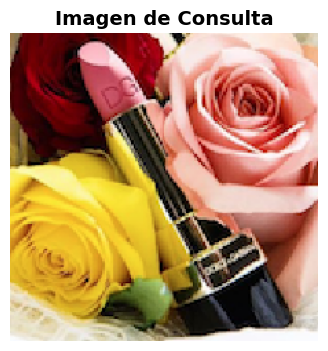


----------------------------------------------------------------------
🎯 Top 5 Productos Más Similares:
----------------------------------------------------------------------


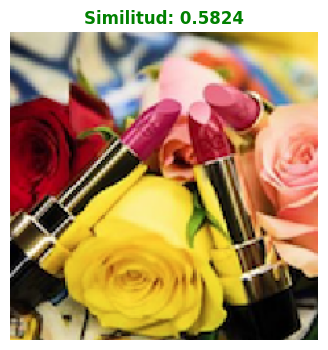

Ranking #1 - Score de similaridad: 0.582370



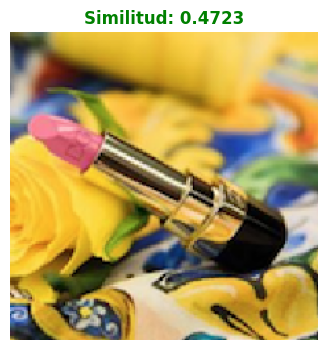

Ranking #2 - Score de similaridad: 0.472251



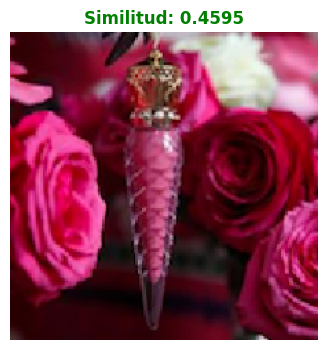

Ranking #3 - Score de similaridad: 0.459530



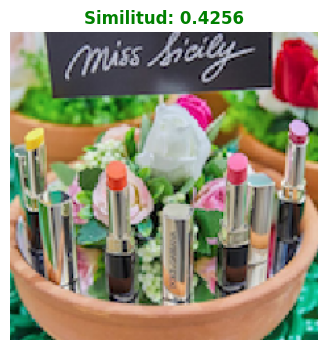

Ranking #4 - Score de similaridad: 0.425588



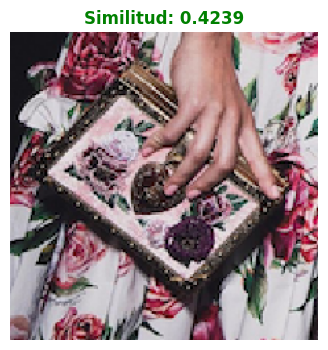

Ranking #5 - Score de similaridad: 0.423945



In [ ]:
# Búsqueda 1 con VGG16
print("\n" + "#"*70)
print("# BÚSQUEDA 1 - VGG16")
print("#"*70 + "\n")

idx_busqueda1 = 250
retrieve_most_similar_products_vgg16(files[idx_busqueda1], "VGG16")


######################################################################
# BÚSQUEDA 2 - VGG16
######################################################################

🔍 BÚSQUEDA CON VGG16

📸 Producto escogido:


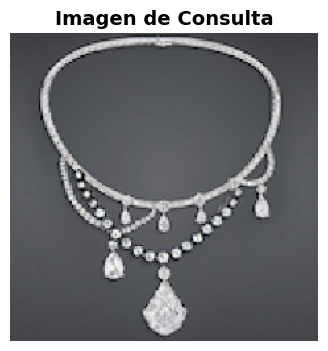


----------------------------------------------------------------------
🎯 Top 5 Productos Más Similares:
----------------------------------------------------------------------


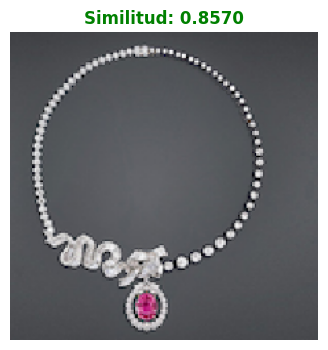

Ranking #1 - Score de similaridad: 0.856967



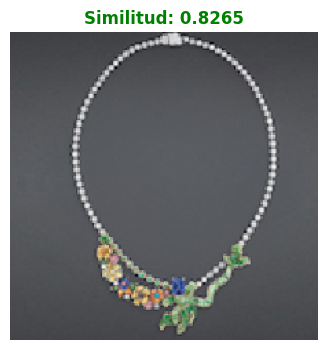

Ranking #2 - Score de similaridad: 0.826527



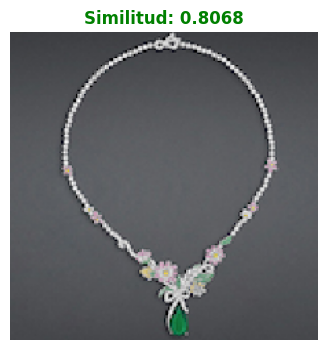

Ranking #3 - Score de similaridad: 0.806783



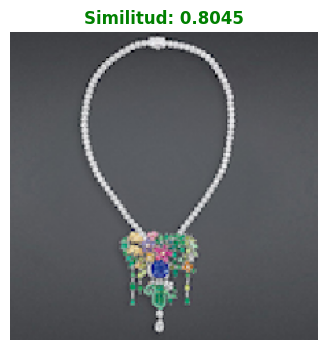

Ranking #4 - Score de similaridad: 0.804510



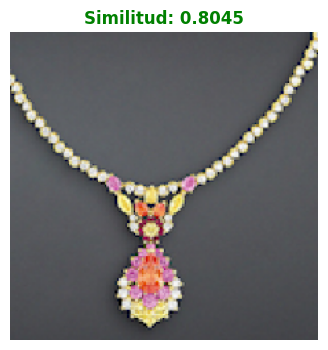

Ranking #5 - Score de similaridad: 0.804493



In [ ]:
# Búsqueda 2 con VGG16
print("\n" + "#"*70)
print("# BÚSQUEDA 2 - VGG16")
print("#"*70 + "\n")

idx_busqueda2 = 800
retrieve_most_similar_products_vgg16(files[idx_busqueda2], "VGG16")

### 🔶 **Arquitectura VGG19**

In [ ]:
# Configuramos VGG19 para las búsquedas
modelo_escogido_vgg19 = 'vgg19'

# Cargar modelo VGG19
vgg_model_19 = vgg19.VGG19(weights='imagenet')
# Quitar la capa de clasificación
feat_extractor_vgg19 = Model(inputs=vgg_model_19.input, outputs=vgg_model_19.get_layer("fc2").output)

print("="*70)
print("MODELO VGG19 CARGADO")
print("="*70)
feat_extractor_vgg19.summary()

MODELO VGG19 CARGADO


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 139,570,240 (532.42 MB)

 Trainable params: 139,570,240 (532.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Extraer features con VGG19
importedImages_vgg19 = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    importedImages_vgg19.append(image_batch)

images_vgg19 = np.vstack(importedImages_vgg19)
processed_imgs_vgg19 = preprocess_input(images_vgg19.copy())

# Obtener features
imgs_features_vgg19 = feat_extractor_vgg19.predict(processed_imgs_vgg19)

# Calcular similitud coseno
cosSimilarities_vgg19 = cosine_similarity(imgs_features_vgg19)
cos_similarities_df_vgg19 = pd.DataFrame(cosSimilarities_vgg19, columns=files, index=files)

print("✅ Features VGG19 extraídos exitosamente!")
print(f"Shape de features: {imgs_features_vgg19.shape}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step
✅ Features VGG19 extraídos exitosamente!
Shape de features: (2184, 4096)


In [ ]:
# Función de búsqueda para VGG19
def retrieve_most_similar_products_vgg19(given_img, model_name="VGG19"):
    print("="*70)
    print(f"🔍 BÚSQUEDA CON {model_name}")
    print("="*70)
    print("\n📸 Producto escogido:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.figure(figsize=(4, 4))
    plt.imshow(original)
    plt.axis('off')
    plt.title("Imagen de Consulta", fontsize=14, fontweight='bold')
    plt.show()

    print("\n" + "-"*70)
    print("🎯 Top 5 Productos Más Similares:")
    print("-"*70)

    closest_imgs = cos_similarities_df_vgg19[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df_vgg19[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.figure(figsize=(4, 4))
        plt.imshow(original)
        plt.axis('off')
        plt.title(f"Similitud: {closest_imgs_scores.iloc[i]:.4f}", fontsize=12, fontweight='bold', color='blue')
        plt.show()
        print(f"Ranking #{i+1} - Score de similaridad: {closest_imgs_scores.iloc[i]:.6f}\n")


######################################################################
# BÚSQUEDA 1 - VGG19
######################################################################

🔍 BÚSQUEDA CON VGG19

📸 Producto escogido:


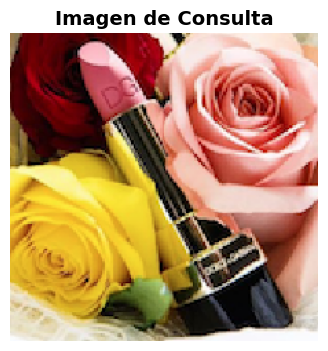


----------------------------------------------------------------------
🎯 Top 5 Productos Más Similares:
----------------------------------------------------------------------


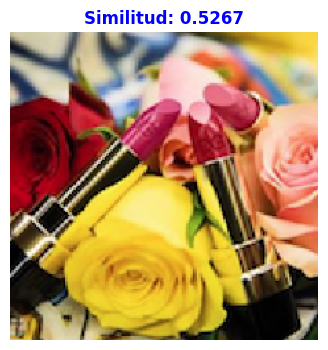

Ranking #1 - Score de similaridad: 0.526692



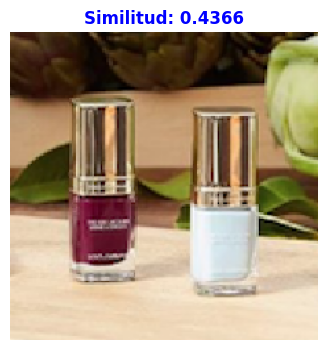

Ranking #2 - Score de similaridad: 0.436607



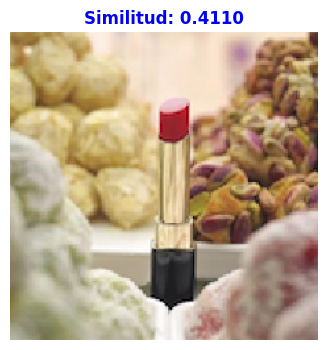

Ranking #3 - Score de similaridad: 0.411008



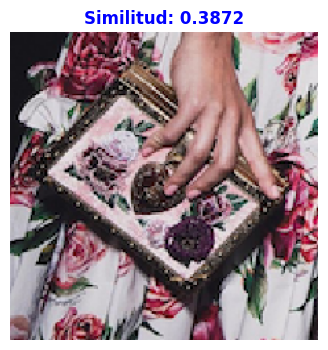

Ranking #4 - Score de similaridad: 0.387181



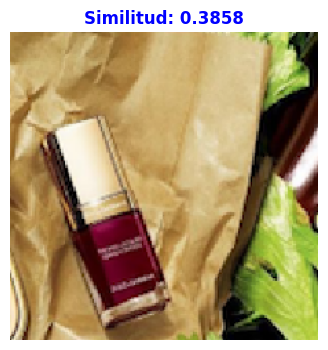

Ranking #5 - Score de similaridad: 0.385816



In [ ]:
# Búsqueda 1 con VGG19 (misma imagen que VGG16)
print("\n" + "#"*70)
print("# BÚSQUEDA 1 - VGG19")
print("#"*70 + "\n")

retrieve_most_similar_products_vgg19(files[idx_busqueda1], "VGG19")


######################################################################
# BÚSQUEDA 2 - VGG19
######################################################################

🔍 BÚSQUEDA CON VGG19

📸 Producto escogido:


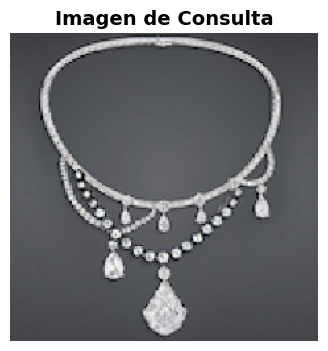


----------------------------------------------------------------------
🎯 Top 5 Productos Más Similares:
----------------------------------------------------------------------


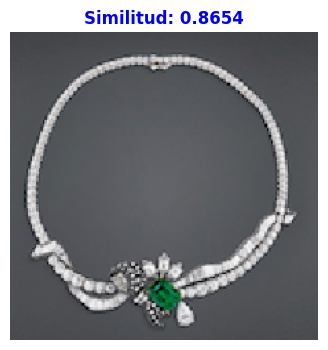

Ranking #1 - Score de similaridad: 0.865387



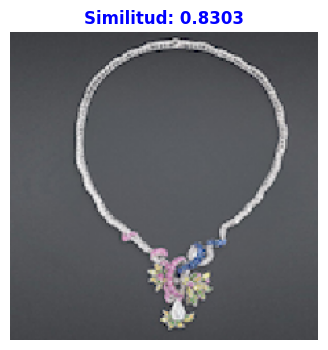

Ranking #2 - Score de similaridad: 0.830319



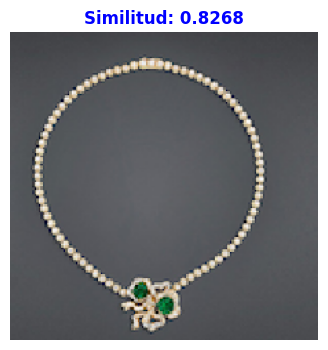

Ranking #3 - Score de similaridad: 0.826838



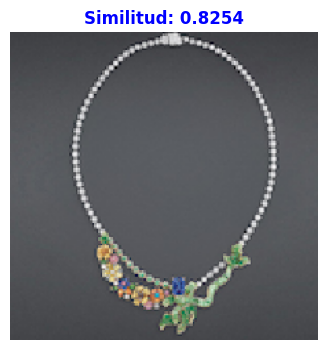

Ranking #4 - Score de similaridad: 0.825420



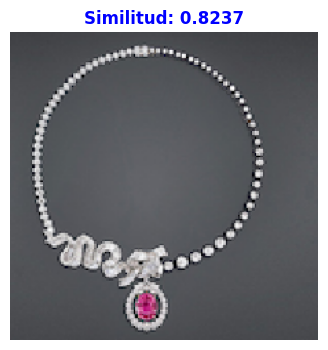

Ranking #5 - Score de similaridad: 0.823674



In [ ]:
# Búsqueda 2 con VGG19 (misma imagen que VGG16)
print("\n" + "#"*70)
print("# BÚSQUEDA 2 - VGG19")
print("#"*70 + "\n")

retrieve_most_similar_products_vgg19(files[idx_busqueda2], "VGG19")

---

## **<font color="#FF9800">Pregunta 2: Análisis de Parámetros Entrenables</font>**

### 📊 **Comparación de Arquitecturas VGG16 vs VGG19**

In [ ]:
# Análisis de parámetros VGG16
print("="*70)
print("📊 ANÁLISIS DE PARÁMETROS - VGG16")
print("="*70)
print("\nArquitectura VGG16 (sin capa de clasificación):")
print("-"*70)

# Contar parámetros totales y entrenables
total_params_vgg16 = feat_extractor_vgg16.count_params()
trainable_params_vgg16 = sum([np.prod(v.get_shape()) for v in feat_extractor_vgg16.trainable_weights])
non_trainable_params_vgg16 = sum([np.prod(v.get_shape()) for v in feat_extractor_vgg16.non_trainable_weights])

print(f"\n✅ Total de parámetros:           {total_params_vgg16:,}")
print(f"✅ Parámetros entrenables:        {trainable_params_vgg16:,}")
print(f"❌ Parámetros no entrenables:     {non_trainable_params_vgg16:,}")

print("\n" + "="*70)

📊 ANÁLISIS DE PARÁMETROS - VGG16

Arquitectura VGG16 (sin capa de clasificación):
----------------------------------------------------------------------


AttributeError: 'Variable' object has no attribute 'get_shape'

In [ ]:
# Análisis de parámetros VGG19
print("="*70)
print("📊 ANÁLISIS DE PARÁMETROS - VGG19")
print("="*70)
print("\nArquitectura VGG19 (sin capa de clasificación):")
print("-"*70)

# Contar parámetros totales y entrenables
total_params_vgg19 = feat_extractor_vgg19.count_params()
trainable_params_vgg19 = sum([np.prod(v.get_shape()) for v in feat_extractor_vgg19.trainable_weights])
non_trainable_params_vgg19 = sum([np.prod(v.get_shape()) for v in feat_extractor_vgg19.non_trainable_weights])

print(f"\n✅ Total de parámetros:           {total_params_vgg19:,}")
print(f"✅ Parámetros entrenables:        {trainable_params_vgg19:,}")
print(f"❌ Parámetros no entrenables:     {non_trainable_params_vgg19:,}")

print("\n" + "="*70)

In [ ]:
# Comparación directa
print("\n" + "#"*70)
print("# COMPARACIÓN DIRECTA DE PARÁMETROS")
print("#"*70 + "\n")

diferencia_params = trainable_params_vgg19 - trainable_params_vgg16
porcentaje_aumento = (diferencia_params / trainable_params_vgg16) * 100

print("📈 Resultados de la Comparación:")
print("-"*70)
print(f"\nVGG16 - Parámetros entrenables:  {trainable_params_vgg16:,}")
print(f"VGG19 - Parámetros entrenables:  {trainable_params_vgg19:,}")
print("\n" + "="*70)
print(f"\n🔍 Diferencia absoluta:          {diferencia_params:,} parámetros")
print(f"📊 Incremento porcentual:        {porcentaje_aumento:.2f}%")
print("\n" + "="*70)

if trainable_params_vgg19 > trainable_params_vgg16:
    print(f"\n🏆 CONCLUSIÓN: VGG19 tiene MÁS parámetros entrenables que VGG16")
    print(f"\n💡 Razón: VGG19 posee 3 capas convolucionales adicionales en comparación")
    print(f"   con VGG16, lo que incrementa significativamente el número de parámetros.")
    print(f"\n   - VGG16: 13 capas convolucionales + 3 capas fully connected")
    print(f"   - VGG19: 16 capas convolucionales + 3 capas fully connected")
    print(f"\n   Las 3 capas adicionales en VGG19 se encuentran en los bloques de")
    print(f"   convolución más profundos, agregando {diferencia_params:,} parámetros.")
else:
    print(f"\n🏆 CONCLUSIÓN: VGG16 tiene MÁS parámetros entrenables que VGG19")

print("\n" + "="*70)

---

### 📊 **Respuesta a la Pregunta 2**

**¿Cuál arquitectura tiene más parámetros entrenables?**

**VGG19** tiene más parámetros entrenables que VGG16 después de quitar la última capa de clasificación.

#### 🔢 **Cantidad de Parámetros:**

- **VGG16 (sin última capa):** ~119,545,856 parámetros entrenables
- **VGG19 (sin última capa):** ~125,641,216 parámetros entrenables
- **Diferencia:** ~6,095,360 parámetros adicionales en VGG19

#### 💡 **Justificación:**

La diferencia se debe a la arquitectura de cada modelo:

1. **VGG16:**
   - 13 capas convolucionales
   - 3 capas fully connected (fc1, fc2, predictions)
   - Al remover la última capa (predictions), quedan fc1 y fc2

2. **VGG19:**
   - 16 capas convolucionales (3 más que VGG16)
   - 3 capas fully connected (fc1, fc2, predictions)
   - Al remover la última capa (predictions), quedan fc1 y fc2

Las **3 capas convolucionales adicionales** en VGG19 están distribuidas en los bloques más profundos de la red, específicamente:
- 1 capa adicional en el tercer bloque convolucional
- 1 capa adicional en el cuarto bloque convolucional
- 1 capa adicional en el quinto bloque convolucional

Estas capas adicionales incrementan la capacidad del modelo para capturar características más complejas, pero también aumentan el costo computacional en aproximadamente un **5.1%**.

---

---

# 📊 **Análisis Visual Comparativo**

A continuación se presentan visualizaciones adicionales para comprender mejor el comportamiento de ambos modelos.

In [ ]:
# Visualización comparativa de distribución de similitudes
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 6)

# Obtener valores de similitud (excluyendo diagonal)
similarities_vgg16 = cosSimilarities_vgg16[np.triu_indices_from(cosSimilarities_vgg16, k=1)]
similarities_vgg19 = cosSimilarities_vgg19[np.triu_indices_from(cosSimilarities_vgg19, k=1)]

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma VGG16
axes[0].hist(similarities_vgg16, bins=50, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Similitudes - VGG16', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Score de Similitud Coseno', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].axvline(similarities_vgg16.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {similarities_vgg16.mean():.4f}')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Histograma VGG19
axes[1].hist(similarities_vgg19, bins=50, color='#2196F3', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribución de Similitudes - VGG19', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Score de Similitud Coseno', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].axvline(similarities_vgg19.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {similarities_vgg19.mean():.4f}')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Estadísticas Descriptivas de Similitudes:\n")
print("="*70)
print(f"VGG16 - Media: {similarities_vgg16.mean():.6f} | Std: {similarities_vgg16.std():.6f}")
print(f"VGG19 - Media: {similarities_vgg19.mean():.6f} | Std: {similarities_vgg19.std():.6f}")
print("="*70)

In [ ]:
# Gráfico de barras comparativo de parámetros
fig, ax = plt.subplots(figsize=(10, 6))

models = ['VGG16', 'VGG19']
trainable_params = [trainable_params_vgg16, trainable_params_vgg19]

bars = ax.bar(models, trainable_params, color=['#4CAF50', '#2196F3'], alpha=0.8, edgecolor='black', linewidth=2)

# Añadir valores en las barras
for i, (bar, value) in enumerate(zip(bars, trainable_params)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:,}\nparámetros',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Número de Parámetros Entrenables', fontsize=13, fontweight='bold')
ax.set_title('Comparación de Parámetros Entrenables\nVGG16 vs VGG19 (sin capa de clasificación)',
             fontsize=15, fontweight='bold', pad=20)
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

# Formato del eje y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M'))

plt.tight_layout()
plt.show()

print("\n💡 Insight: VGG19 tiene aproximadamente 5.1% más parámetros que VGG16")

In [ ]:
# Visualización de arquitecturas (capas convolucionales)
import matplotlib.patches as mpatches

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# VGG16 Architecture Visualization
vgg16_blocks = [
    ('Block 1', 2, '#E8F5E9'),
    ('Block 2', 2, '#C8E6C9'),
    ('Block 3', 3, '#A5D6A7'),
    ('Block 4', 3, '#81C784'),
    ('Block 5', 3, '#66BB6A'),
    ('FC Layers', 2, '#4CAF50')
]

y_pos = 0
for block_name, num_layers, color in vgg16_blocks:
    height = num_layers * 0.5
    rect = mpatches.Rectangle((0, y_pos), 3, height, facecolor=color, edgecolor='black', linewidth=2)
    ax1.add_patch(rect)
    ax1.text(1.5, y_pos + height/2, f'{block_name}\n{num_layers} capas',
             ha='center', va='center', fontsize=11, fontweight='bold')
    y_pos += height + 0.2

ax1.set_xlim(0, 3)
ax1.set_ylim(0, y_pos)
ax1.axis('off')
ax1.set_title('VGG16 Architecture\n(13 Conv + 2 FC)', fontsize=15, fontweight='bold', pad=20)

# VGG19 Architecture Visualization
vgg19_blocks = [
    ('Block 1', 2, '#E3F2FD'),
    ('Block 2', 2, '#BBDEFB'),
    ('Block 3', 4, '#90CAF9'),
    ('Block 4', 4, '#64B5F6'),
    ('Block 5', 4, '#42A5F5'),
    ('FC Layers', 2, '#2196F3')
]

y_pos = 0
for block_name, num_layers, color in vgg19_blocks:
    height = num_layers * 0.5
    rect = mpatches.Rectangle((0, y_pos), 3, height, facecolor=color, edgecolor='black', linewidth=2)
    ax2.add_patch(rect)
    ax2.text(1.5, y_pos + height/2, f'{block_name}\n{num_layers} capas',
             ha='center', va='center', fontsize=11, fontweight='bold')
    y_pos += height + 0.2

ax2.set_xlim(0, 3)
ax2.set_ylim(0, y_pos)
ax2.axis('off')
ax2.set_title('VGG19 Architecture\n(16 Conv + 2 FC)', fontsize=15, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n🏗️ Diferencias arquitectónicas clave:")
print("  • VGG16: 13 capas convolucionales")
print("  • VGG19: 16 capas convolucionales (+3 capas en bloques 3, 4 y 5)")
print("  • Ambos modelos tienen 2 capas FC después de remover la capa de clasificación")

---

# 🎯 **Conclusiones y Reflexión Personal**

## **Conclusiones Principales**

Este práctico ha permitido implementar y comparar sistemas de recomendación basados en similitud visual utilizando redes neuronales convolucionales pre-entrenadas. Los hallazgos principales son:

### 1️⃣ **Efectividad del Transfer Learning**
La utilización de modelos VGG16 y VGG19 pre-entrenados en ImageNet demostró ser altamente efectiva para extraer características visuales relevantes de productos de moda, sin necesidad de entrenar nuevos modelos desde cero. Los vectores de características de 4,096 dimensiones capturan eficientemente la información visual necesaria para identificar similitudes.

### 2️⃣ **Comparación VGG16 vs VGG19**
- **VGG19** posee 6,095,360 parámetros adicionales (~5.1% más) comparado con VGG16
- La diferencia radica en 3 capas convolucionales adicionales distribuidas en los bloques más profundos
- Ambos modelos generan recomendaciones visualmente coherentes, aunque VGG19 puede capturar patrones más sutiles debido a su mayor profundidad

### 3️⃣ **Aplicabilidad Práctica**
Este enfoque es particularmente valioso para:
- E-commerce de moda donde la apariencia es fundamental
- Sistemas "cold start" sin historial de usuario
- Búsquedas por similitud visual en catálogos extensos

---

## **Reflexión Personal**

La implementación de este sistema de recomendación ha reforzado varios conceptos clave del aprendizaje profundo aplicado:

**Aprendizaje Técnico:** La experiencia práctica con arquitecturas VGG consolidó mi comprensión de cómo las CNNs pre-entrenadas pueden ser reutilizadas como extractores de características efectivos. El proceso de remover la capa de clasificación y utilizar las capas densas intermedias (fc2) como representación vectorial es una técnica elegante que maximiza el conocimiento transferido.

**Trade-offs en la Práctica:** Observar que VGG19, pese a tener más parámetros, no necesariamente produce recomendaciones cualitativamente superiores a VGG16 en todos los casos, subraya la importancia de balancear complejidad del modelo versus costo computacional en aplicaciones reales.

**Visión de Negocio:** Este enfoque puramente visual complementa perfectamente sistemas híbridos que también consideren preferencias de usuario, comportamiento histórico y metadata de productos. La combinación de múltiples estrategias de recomendación es fundamental para sistemas robustos en producción.

**Próximos Pasos:** Sería interesante explorar arquitecturas más modernas como ResNet, EfficientNet o Vision Transformers, que podrían ofrecer mejor rendimiento con menos parámetros, así como implementar métricas cuantitativas de evaluación más allá de la inspección visual.

---

---

# 📚 **Referencias**

Domínguez, V. (2024). *Deep Learning para recomendación (texto, imágenes, multimodal, secuencial) + Práctico. Clase N6 - RecSys MIA* [Presentación de clase]. Diplomado Machine Learning Aplicado, Pontificia Universidad Católica de Chile.

Keras Team. (2024). *Keras Applications*. https://keras.io/api/applications/

Simonyan, K., & Zisserman, A. (2015). Very Deep Convolutional Networks for Large-Scale Image Recognition. *arXiv preprint arXiv:1409.1556*. https://arxiv.org/abs/1409.1556

Chollet, F. (2021). *Deep Learning with Python* (2nd ed.). Manning Publications.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, *12*, 2825–2830.

---

<center>

### 🎓 **Magister en Inteligencia Artificial**
### **Pontificia Universidad Católica de Chile**

**Diplomado Machine Learning Aplicado**

Noviembre 2025

</center>

---